In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import sympy as sp
sp.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='cm'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

### 1
非凸

In [2]:
A = np.array([[1, 4, 5], [4, 2, 6], [5, 6, 3]])
obj = lambda x: x@A@x
x0 = np.random.randn(3)
cons = [{'type': 'eq', 'fun': lambda x: x[0]**2 + x[1]**2 + x[2]**2 - 1}]
bd = None
ret = minimize(obj, x0, constraints=cons, bounds=bd)
print(ret)

     fun: -3.6686830983052436
     jac: array([-2.29649386, -4.23623013,  5.5333004 ])
 message: 'Optimization terminated successfully'
    nfev: 34
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.31298606,  0.57734991, -0.75412652])


### 2

In [3]:
n = np.arange(2, 10)
r = np.array([1, 0, 1, 4, 3, 4, 1, 0])
x = cp.Variable(integer=True)
q = cp.Variable(8, integer=True)
obj = cp.Minimize(x)
cons = [
    x == cp.multiply(q, n) + r,
    x >= 0,
    q >= 0,
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：{x.value}'); print(f'最优值为：{prob.value}')

最优解为：1089.0
最优值为：1089.0


### 3

In [4]:
x = cp.Variable(5, integer=True)
obj = cp.Minimize(x[0]**2 + x[1]**2 + 3*x[2]**2 + 4*x[3]**2 + 2*x[4]**2\
      - 8*x[0] - 2*x[1] - 3*x[2] -1*x[3] -2*x[4])
cons = [
    0 <= x, x <= 99,
    cp.sum(x) <= 400,
    x[0] + 2*x[1] + 2*x[2] + x[3] + 6*x[4] <= 800,
    2*x[0] + x[1] + 6*x[2] <= 200,
    x[2] + x[3] + 5*x[4] <= 200,
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：{x.value}'); print(f'最优值为：{prob.value}')

最优解为：[4. 1. 1. 0. 1.]
最优值为：-17.0


### 4

In [5]:
a = np.arange(100, 0, -1)
x = cp.Variable(100, nonneg=True)
obj = cp.Maximize(cp.sum(cp.sqrt(x)))
cons = [
    x[0] <= 10,
    x[0] + 2*x[1] <= 20,
    x[0] + 2*x[1] + 3*x[2] <= 30,
    x[0] + 2*x[1] + 3*x[2] + 4*x[3] <= 40,
    cp.sum(cp.multiply(a, x)) <= 1000,
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：{x.value}'); print(f'最优值为：{prob.value}')

最优解为：[1.92849267e-02 1.96760731e-02 2.00796292e-02 2.04959319e-02
 2.09253707e-02 2.13682024e-02 2.18252423e-02 2.22971056e-02
 2.27844395e-02 2.32879276e-02 2.38082895e-02 2.43462934e-02
 2.49027413e-02 2.54784870e-02 2.60744357e-02 2.66915397e-02
 2.73308154e-02 2.79933363e-02 2.86802446e-02 2.93927502e-02
 3.01321428e-02 3.08997912e-02 3.16971543e-02 3.25257844e-02
 3.33873395e-02 3.42835880e-02 3.52164154e-02 3.61878411e-02
 3.72000224e-02 3.82552740e-02 3.93560727e-02 4.05050777e-02
 4.17051446e-02 4.29593456e-02 4.42709843e-02 4.56436230e-02
 4.70811028e-02 4.85875732e-02 5.01675193e-02 5.18257978e-02
 5.35676741e-02 5.53988623e-02 5.73255751e-02 5.93545732e-02
 6.14932303e-02 6.37495932e-02 6.61324635e-02 6.86514820e-02
 7.13172306e-02 7.41413355e-02 7.71366098e-02 8.03171898e-02
 8.36987218e-02 8.72985664e-02 9.11360707e-02 9.52329972e-02
 9.96151304e-02 1.04296180e-01 1.09209402e-01 1.14641140e-01
 1.20306724e-01 1.26793549e-01 1.33550390e-01 1.40862053e-01
 1.48794100e-01 1.5

### 5
非凸

In [6]:
def obj(x):
    x1, x2, x3 = x
    return (-1)*(2*x1 + 3*x1**2 + 3*x2 + x2**2 + x3)

def ineq(x):
    x1, x2, x3 = x
    return [
        10 - (x1 + 2*x1**2 + x2 + 2*x2**2 + x3),
        50 - (x1 + x1**2 + x2 + x2**2 - x3),
        40 - (2*x1 + x1**2 + 2*x2 + x3),
        x1 + 2*x2 - 1,
    ]

def eq(x):
    x1, x2, x3 = x
    return x1**2 + x3 - 2

x0 = np.random.randn(3)
cons = [
    {'type': 'ineq', 'fun': ineq},
    {'type': 'eq', 'fun': eq},
]
bd = [(0, None), (None,None), (None, None)]
ret = minimize(obj, x0, constraints=cons, bounds=bd)
print(ret)
print('-'*100)
print("最优值为：", -ret.fun)

     fun: -18.083333333340548
     jac: array([-16.        ,  -3.33333325,  -1.        ])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([ 2.33333334,  0.16666665, -3.44444446])
----------------------------------------------------------------------------------------------------
最优值为： 18.083333333340548


### 6
组合投资问题

In [7]:
M = 50e4
profit = np.array([5, 8, 10])
risk = np.array([2, 6, 10])
price = np.array([20, 25, 30])
r = np.array([[1, 5/24, -0.5], [5/24, 1, -0.25], [-0.5, -0.25, 1]])
F = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        F[i, j] = r[i, j]*(risk[i]*risk[j])  # 通过相关系数反解出协方差 (risk本来就是标准差, 无需开方)
F

array([[  4. ,   2.5, -10. ],
       [  2.5,  36. , -15. ],
       [-10. , -15. , 100. ]])

In [8]:
x = cp.Variable(3, integer=True)
obj = cp.Minimize(cp.quad_form(x, F))
cons = [
    profit @ x >= 0.20*M,
    price @ x <= M,
    x >= 0,
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：{x.value}'); print(f'最优值为：{prob.value}')
print(f'投资回报率为：{(profit @ x.value) / (price @ x.value)}')

最优解为：[13110.  1530.  2221.]
最优值为：681046300.0
投资回报率为：0.2724201808870001


In [9]:
x = cp.Variable(3, integer=True)
obj = cp.Minimize(cp.quad_form(x, F))
ROIs = []
risks = []
for rate_bound in np.linspace(0.05, 0.25, 100):
    cons = [
        profit @ x >= rate_bound*M,
        price @ x <= M,
        x >= 0,
    ]
    prob = cp.Problem(obj, cons)
    prob.solve(solver='GUROBI')
    ROIs.append((profit @ x.value) / (price @ x.value))
    risks.append(np.sqrt(prob.value))   # 转换为标准差

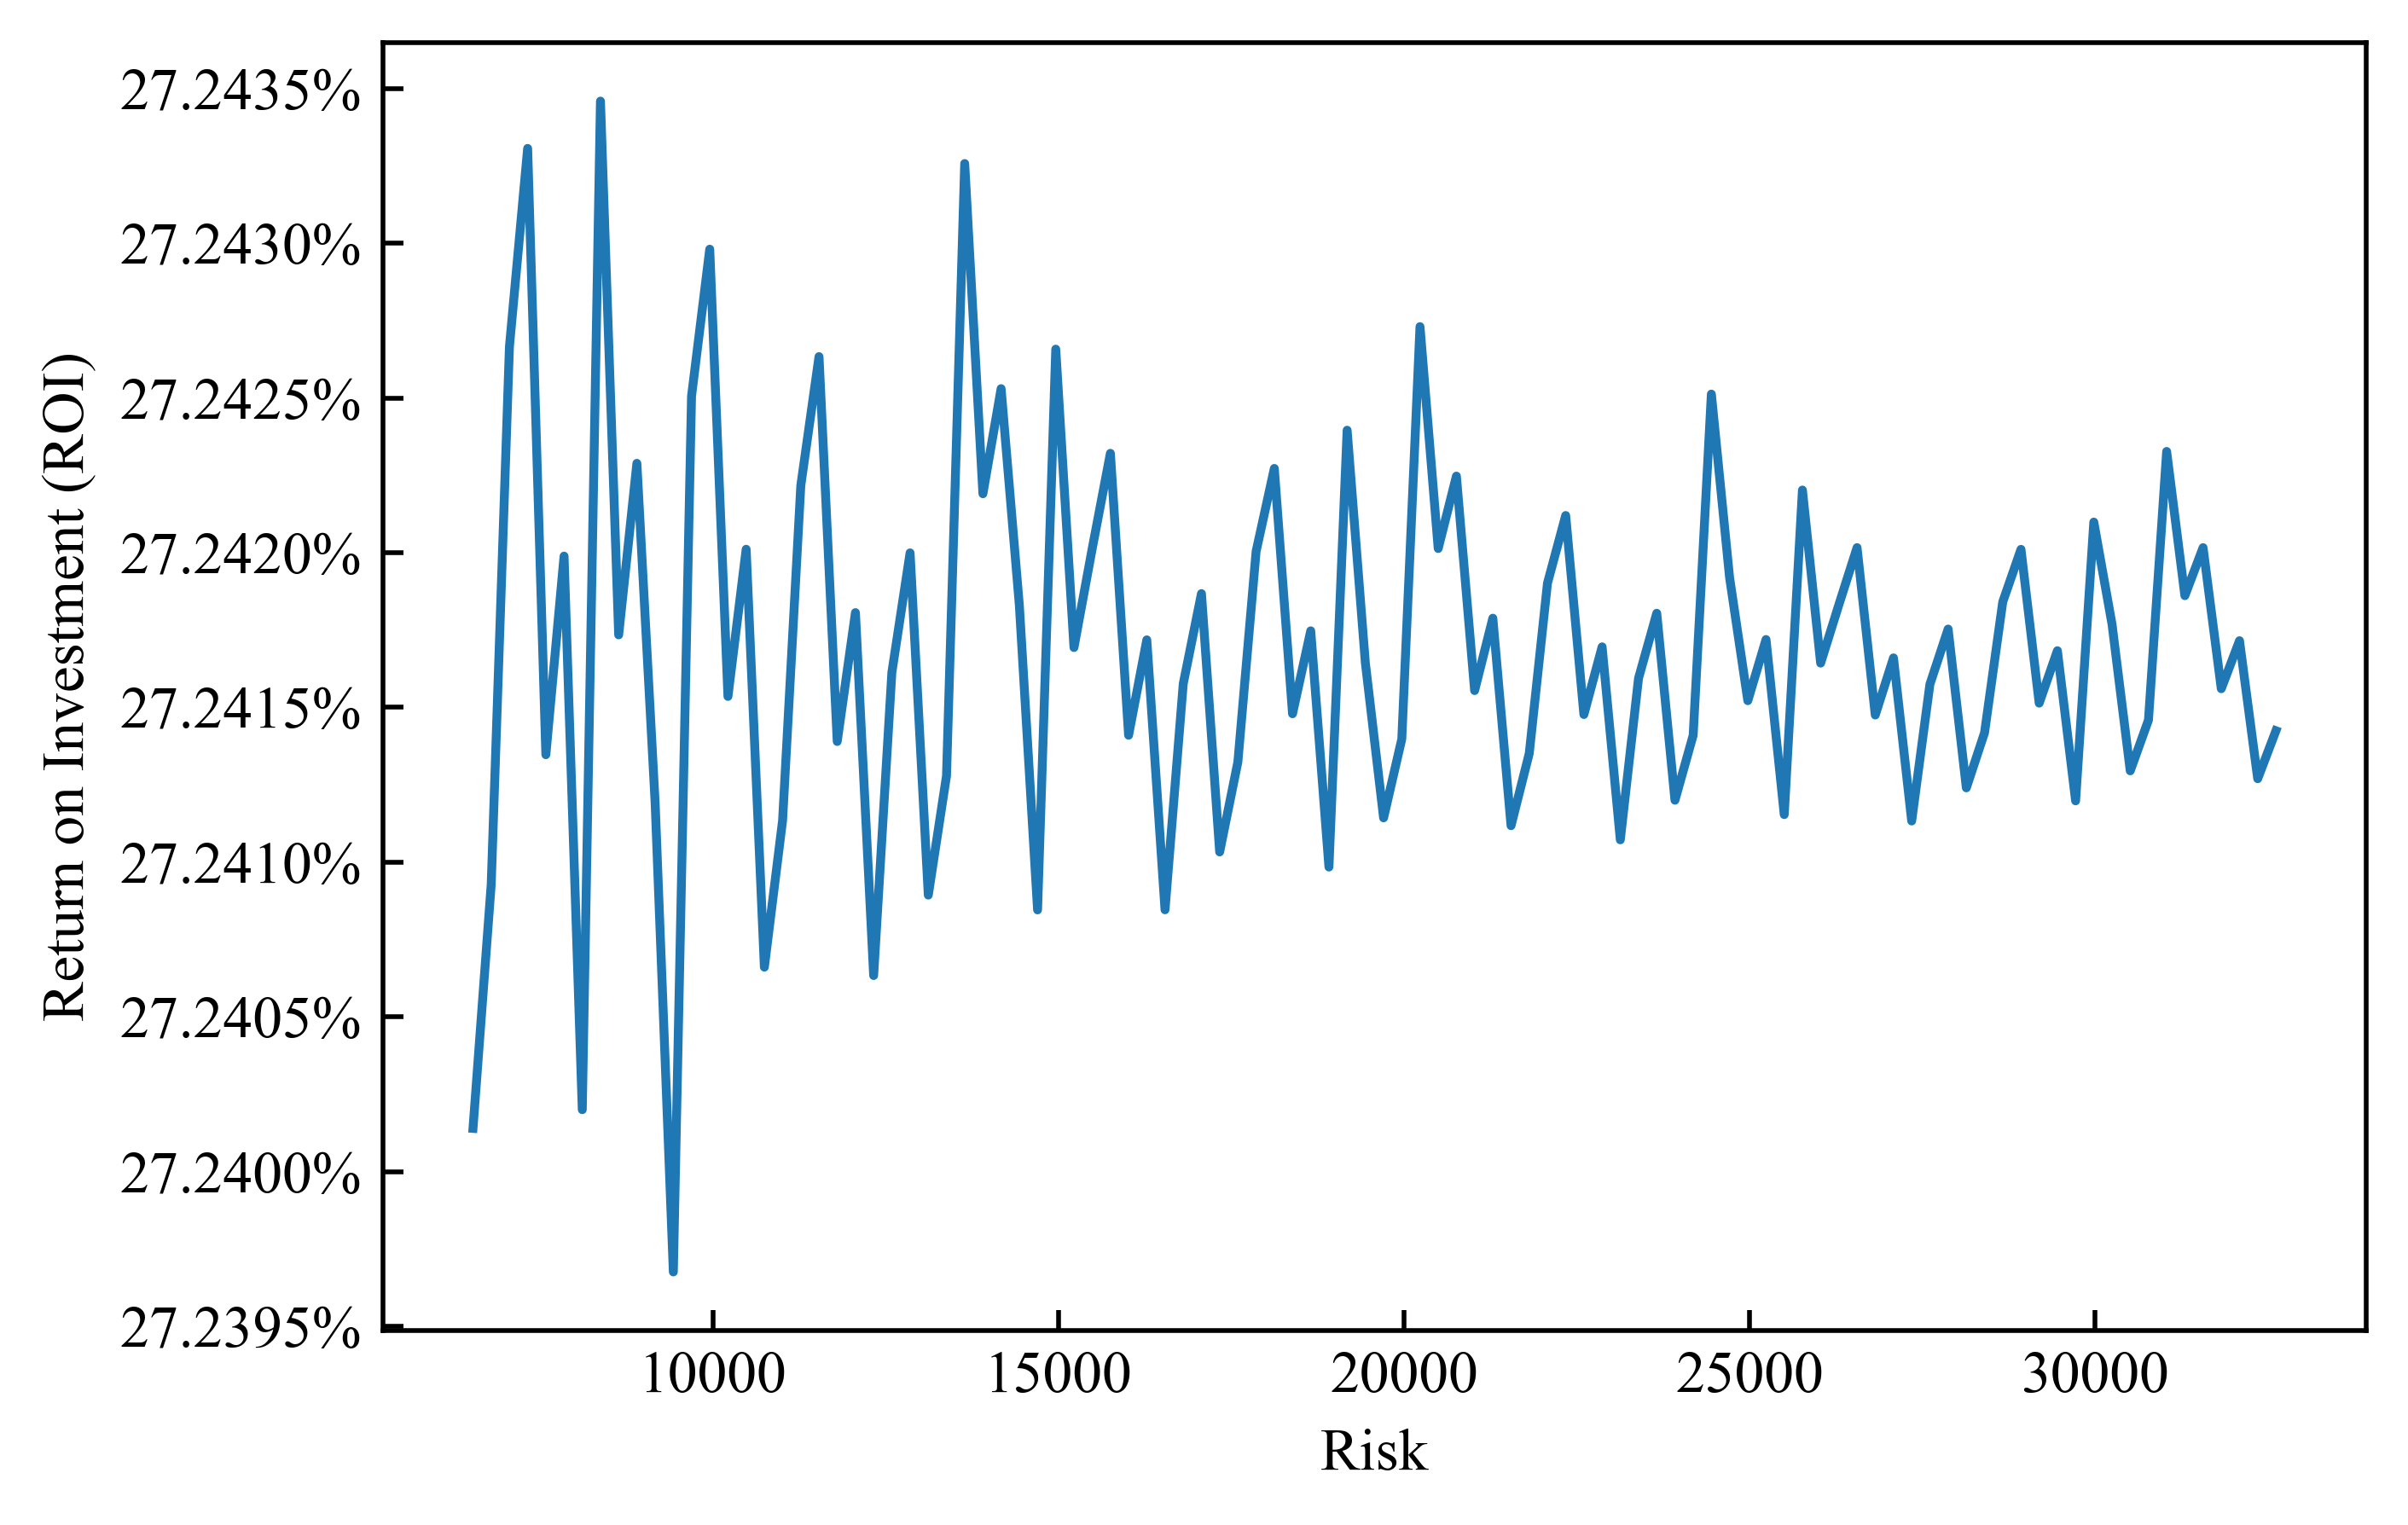

In [10]:
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111)
ax.plot(risks, ROIs, '-')
ax.set_xlabel('Risk')
ax.set_ylabel('Return on Investment (ROI)')
ax.yaxis.set_major_formatter(lambda x, pos: f'{x*100:.4f}%')
fig.show()

### 7
生产计划问题

In [11]:
x = cp.Variable(3, integer=True)
cumulative_output = cp.cumsum(x)
demand = np.array([40, 60, 80])
cumulative_demand = np.cumsum(demand)
max_output = 100
a, b, c = 50, 0.2, 4
product_fee = cp.sum(a*x + b*x**2)
store_fee = cp.sum(c*(cumulative_output - cumulative_demand)) - c*(cumulative_output[-1] - cumulative_demand[-1])   # 最后一年的产量必然不大于需求
obj = cp.Minimize(product_fee + store_fee)
cons = [
    cumulative_output >= cumulative_demand
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：{x.value}'); print(f'最优值为：{prob.value}')

最优解为：[50. 60. 70.]
最优值为：11280.0


In [12]:
x1, x2, x3 = sp.var('x1 x2 x3')
cumulative_output = [x1, x1+x2, x1+x2+x3]
a, b, c = sp.var('a b c')
p1 = a*x1 + b*x1**2
p2 = a*x2 + b*x2**2
p3 = a*x3 + b*x3**2
s1 = c*(cumulative_output[0] - cumulative_demand[0])
s2 = c*(cumulative_output[1] - cumulative_demand[1])
s3 = 0
p = p1 + p2 + p3
s = s1 + s2 + s3
total_cost = (p + s).simplify()
y = total_cost

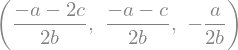

In [13]:
dydx1 = sp.diff(y, x1)
dydx2 = sp.diff(y, x2)
dydx3 = sp.diff(y, x3)
x1min, x2min, x3min = sp.solve([dydx1, dydx2, dydx3], [x1, x2, x3]).values()
x1min, x2min, x3min

In [14]:
dx1minda = sp.diff(x1min, a)
dx2minda = sp.diff(x2min, a)
dx3minda = sp.diff(x3min, a)
sx1a = dx1minda * (a/x1min)
sx2a = dx1minda * (a/x2min)
sx3a = dx1minda * (a/x3min)

print('当 a=50, b=0.2, c=4 时')
print('x1对a的灵敏性：', sx1a.subs({a: 50, b: 0.2, c:4}).n(4))
print('x2对a的灵敏性：', sx2a.subs({a: 50, b: 0.2, c:4}).n(4))
print('x3对a的灵敏性：', sx3a.subs({a: 50, b: 0.2, c:4}).n(4))

当 a=50, b=0.2, c=4 时
x1对a的灵敏性： 0.8621
x2对a的灵敏性： 0.9259
x3对a的灵敏性： 1.000


In [15]:
dx1mindb = sp.diff(x1min, b)
dx2mindb = sp.diff(x2min, b)
dx3mindb = sp.diff(x3min, b)
sx1b = dx1mindb * (b/x1min)
sx2b = dx1mindb * (b/x2min)
sx3b = dx1mindb * (b/x3min)

print('当 a=50, b=0.2, c=4 时')
print('x1对b的灵敏性：', sx1b.subs({a: 50, b: 0.2, c:4}).n(4))
print('x2对b的灵敏性：', sx2b.subs({a: 50, b: 0.2, c:4}).n(4))
print('x3对b的灵敏性：', sx3b.subs({a: 50, b: 0.2, c:4}).n(4))

当 a=50, b=0.2, c=4 时
x1对b的灵敏性： -1.000
x2对b的灵敏性： -1.074
x3对b的灵敏性： -1.160


In [16]:
dx1mindc = sp.diff(x1min, c)
dx2mindc = sp.diff(x2min, c)
dx3mindc = sp.diff(x3min, c)
sx1c = dx1mindc * (c/x1min)
sx2c = dx1mindc * (c/x2min)
sx3c = dx1mindc * (c/x3min)

print('当 a=50, b=0.2, c=4 时')
print('x1对c的灵敏性：', sx1c.subs({a: 50, b: 0.2, c:4}).n(4))
print('x2对c的灵敏性：', sx2c.subs({a: 50, b: 0.2, c:4}).n(4))
print('x3对c的灵敏性：', sx3c.subs({a: 50, b: 0.2, c:4}).n(4))

当 a=50, b=0.2, c=4 时
x1对c的灵敏性： 0.1379
x2对c的灵敏性： 0.1481
x3对c的灵敏性： 0.1600


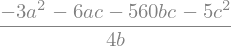

In [17]:
ymin = y.subs({x1: x1min, x2: x2min, x3: x3min}).simplify()
ymin

In [18]:
dyminda = sp.diff(ymin, a)
dymindb = sp.diff(ymin, b)
dymindc = sp.diff(ymin, c)
sya = dyminda * (a/ymin)
syb = dymindb * (b/ymin)
syc = dymindc * (c/ymin)

print('当 a=50, b=0.2, c=4 时')
print('y对a的灵敏性：', sya.subs({a: 50, b: 0.2, c:4}).n(4))
print('y对b的灵敏性：', syb.subs({a: 50, b: 0.2, c:4}).n(4))
print('y对c的灵敏性：', syc.subs({a: 50, b: 0.2, c:4}).n(4))

当 a=50, b=0.2, c=4 时
y对a的灵敏性： 1.756
y对b的灵敏性： -0.9515
y对c的灵敏性： 0.1959
